In [1]:
import torch
from utils import load_model
from EDA import plot_images,plot_metric
from models import VAE
from dataloaders import get_loaders
from config import get_args

2023-05-23 20:36:51.463646: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-23 20:36:52.012726: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Samples

In [1]:
%load_ext autoreload
%autoreload 2

from dataloaders import get_loaders
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
from omegaconf import OmegaConf
configs = OmegaConf.load("./configs/sol2.yaml")

train_dataset, val_dataset, train_loader, val_loader = get_loaders(**configs.dataloader)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def plot_images(
    dataloader,
    dataloader_title,
    title,
    title_fontsize=20,
    title_padding=1.07,
    figsize=(6, 6),
):
    batch_data = next(iter(dataloader))
    images, _ = batch_data
    batch_size = images.shape[0]
    assert batch_size >= 100, "Batch size should be greater equal than 100"
    # Initialize an empty list to store the selected indices
    selected_indices = np.random.choice(batch_size, size=100, replace=False)
    selected_images = images[selected_indices]
    # Loop over each integer from 0 to 9 and select 10 random indices

    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(
        nrows=10, ncols=10, wspace=0.0, hspace=0.0, top=1, bottom=0, left=0, right=1
    )
    image_index = 0
    for row_index in range(10):
        for col_index in range(10):
            current_image = selected_images[image_index]

            image_transposed = current_image.cpu().detach().numpy().transpose((1, 2, 0))
            ax = plt.subplot(gs[row_index, col_index])
            ax.imshow(image_transposed, cmap="gray")
            ax.set_axis_off()
            image_index += 1

    fig.suptitle(
        f"{dataloader_title} - {title}",
        fontsize=title_fontsize,
        y=title_padding,
    )
    name_for_export = f"{dataloader_title}_VAE".lower().replace(" ", "_")

    fig.savefig(f"./figs/{name_for_export}")
    plt.show()



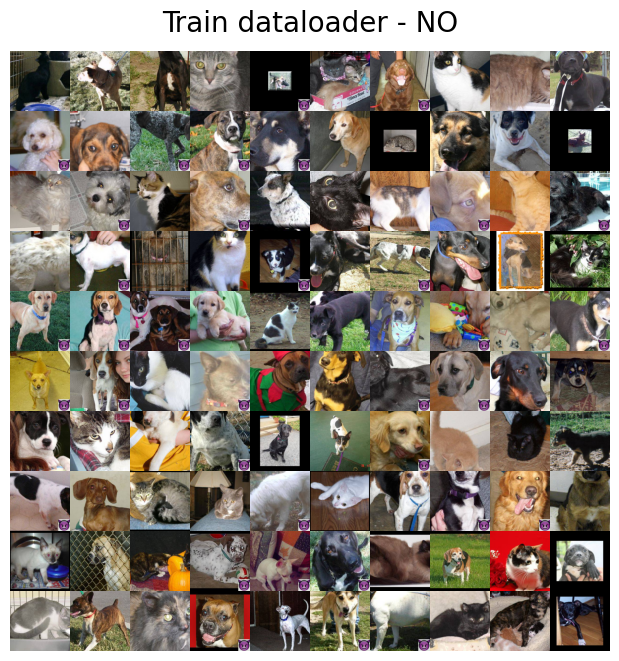

In [4]:
plot_images(
    dataloader = train_loader,
    dataloader_title = "Train dataloader",
    title = "NO",
)

# Metrics

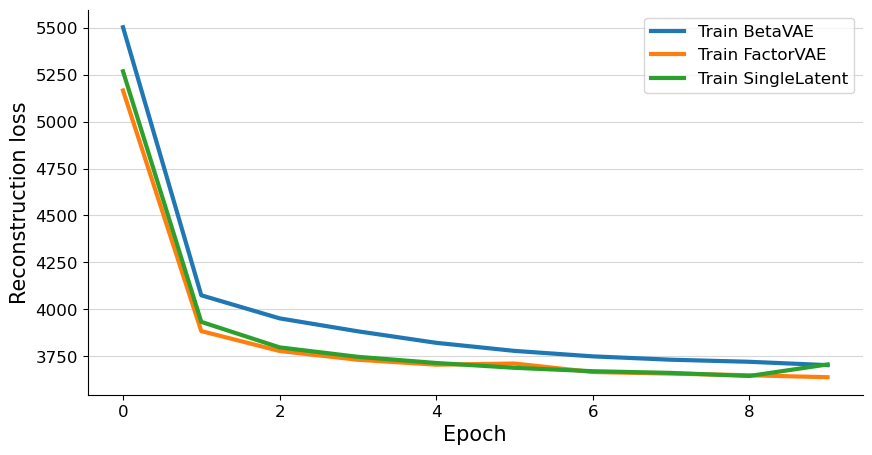

In [4]:
args_plot = {"figsize":(10,5),
               "linewidth_plot":3,
               "title_fontsize":25,
               "title_padding":1,
               "xy_ticks_fontsize":12,
               "xylabel_fontsize":15,
               "legend_fontsize":12,
               "ylim":None,
               "xy_label" : ("Epoch","Reconstruction loss")}

list_of_report_paths = ["./reports/report_vae_epoch_10.csv","./reports/report_fvae_epoch_10.csv","./reports/report_single_latent_epoch_10.csv", ]
list_of_cols_title = ["BetaVAE","FactorVAE","SingleLatent"]

plot_metric(list_of_cols_title = list_of_cols_title,
            list_of_cols_name = ["rec_loss"]*3,
            list_of_cols_mode = ["train"]*3,
            list_of_report_paths = list_of_report_paths,
            xy_label = ("Epoch","Reconstruction loss"),
            args_plot = args_plot,
            compact_col="losses_avg")



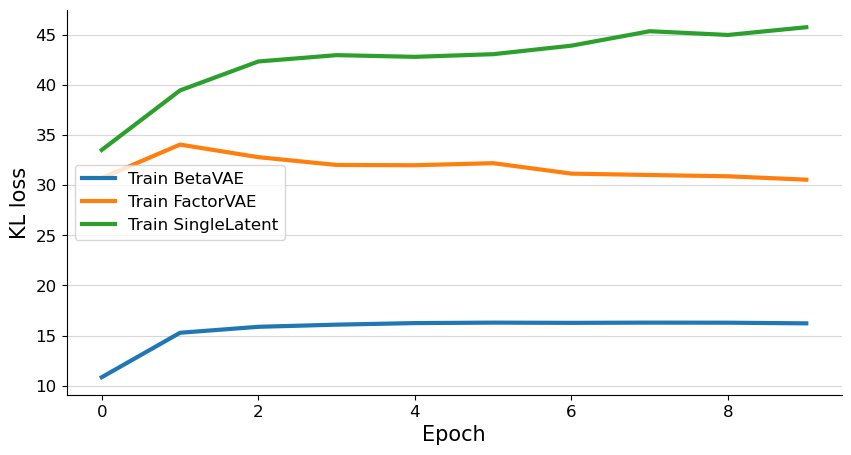

In [5]:
args_plot = {"figsize":(10,5),
               "linewidth_plot":3,
               "title_fontsize":25,
               "title_padding":1,
               "xy_ticks_fontsize":12,
               "xylabel_fontsize":15,
               "legend_fontsize":12,
               "ylim":None,
               "xy_label" : ("Epoch","KL loss")}

list_of_report_paths = ["./reports/report_vae_epoch_10.csv","./reports/report_fvae_epoch_10.csv","./reports/report_single_latent_epoch_10.csv", ]
list_of_cols_title = ["BetaVAE","FactorVAE","SingleLatent"]

plot_metric(list_of_cols_title = list_of_cols_title,
            list_of_cols_name = ["kl_loss"]*3,
            list_of_cols_mode = ["train"]*3,
            list_of_report_paths = list_of_report_paths,
            xy_label = ("Epoch","KL loss"),
            args_plot = args_plot,
            compact_col="losses_avg")



# End